In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [28]:
df = pd.read_csv("/Users/shakthimaha/Downloads/zcored_data.csv")

In [29]:
# Check basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4642 entries, 0 to 4641
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   LSOA11CD                                  4642 non-null   object 
 1   LSOA11NM                                  4642 non-null   object 
 2   geometry                                  4642 non-null   object 
 3   Fuel_Poverty_2011                         4642 non-null   float64
 4   Mean_Elec_Consumption                     4642 non-null   float64
 5   Mean_Gas_Consumption                      4642 non-null   float64
 6   Avg_Build_Year                            4642 non-null   float64
 7   Median_Annual_household_income            4642 non-null   float64
 8   Density_of_Households                     4642 non-null   float64
 9   households_with_resident_percentage       4642 non-null   float64
 10  households_no_resident_percentage   

In [30]:
# Define independent (X) and dependent (Y) variables
X = df.drop(columns=['Fuel_Poverty_2011'])  # Features
Y = df['Fuel_Poverty_2011']  # Target variable

In [31]:
# Check for missing values
print("Missing values in each column:\n", X.isnull().sum())


Missing values in each column:
 LSOA11CD                                    0
LSOA11NM                                    0
geometry                                    0
Mean_Elec_Consumption                       0
Mean_Gas_Consumption                        0
Avg_Build_Year                              0
Median_Annual_household_income              0
Density_of_Households                       0
households_with_resident_percentage         0
households_no_resident_percentage           0
whole_house_detached_percentage             0
whole_house_semi_detached_percentage        0
whole_house_terraced_percentage             0
flat_maisonette_apartment_percentage        0
Revised_Energy_Efficiency_Rating_Numeric    0
Revised_Energy_Efficiency                   0
dtype: int64


In [32]:
# Convert categorical variables (if any)
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col])

In [33]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% variance
X_pca = pca.fit_transform(X_scaled)

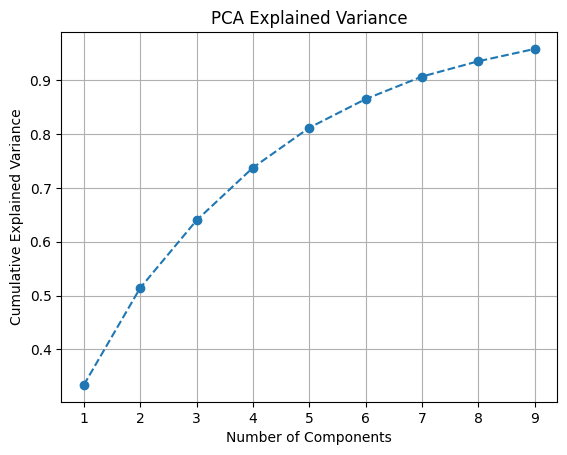

In [35]:
# Explained variance plot
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid()
plt.show()

In [36]:
# Print the number of reduced features
print(f"Original Features: {X.shape[1]}")
print(f"Reduced Features after PCA: {X_pca.shape[1]}")

Original Features: 16
Reduced Features after PCA: 9


In [37]:
# Select relevant columns
columns_to_check = [
    "Mean_Elec_Consumption", "Mean_Gas_Consumption", "Avg_Build_Year",
    "Median_Annual_household_income", "Density_of_Households",
    "households_with_resident_percentage", "households_no_resident_percentage",
    "whole_house_detached_percentage", "whole_house_semi_detached_percentage",
    "whole_house_terraced_percentage", "flat_maisonette_apartment_percentage",
    "Revised_Energy_Efficiency_Rating_Numeric", "Revised_Energy_Efficiency"
]

# Check mean and standard deviation
mean_std = df[columns_to_check].describe().loc[['mean', 'std']]
print(mean_std)

      Mean_Elec_Consumption  Mean_Gas_Consumption  Avg_Build_Year  \
mean          -3.231362e-12          3.877635e-12    1.551057e-11   
std            1.000108e+00          1.000108e+00    1.000108e+00   

      Median_Annual_household_income  Density_of_Households  \
mean                    7.324425e-12           6.678183e-12   
std                     1.000108e+00           1.000108e+00   

      households_with_resident_percentage  households_no_resident_percentage  \
mean                         6.462724e-13                       1.292551e-12   
std                          1.000108e+00                       1.000108e+00   

      whole_house_detached_percentage  whole_house_semi_detached_percentage  \
mean                    -3.231368e-12                          1.938811e-12   
std                      1.000108e+00                          1.000108e+00   

      whole_house_terraced_percentage  flat_maisonette_apartment_percentage  \
mean                     8.617037e-13       